In [1]:
using thesis
using Plots
using JLD2
using LinearAlgebra
using DataFrames

In [2]:
function plot_results(
    data,
    errors,
    instrument,
    parameter_indx
)
    plots = []
    parameters = ["Synchrotron index"]
    param_value = [-3.0]
    for e in error 
        a = scatter(["ideal"], [data[instrument][e]["ideal"]["x"][parameter_indx]], yerr = sqrt.(diag(data[instrument][e]["ideal"]["Sigma"]))[parameter_indx], legend = false)
        for i in labels
            a = scatter!([i], [data[instrument][e][i]["x"][parameter_indx]], yerr = sqrt.(diag(data[instrument][e][i]["Sigma"]))[parameter_indx])
        end  
        a = hline!([param_value[parameter_indx]], label = "PySM value")
        a = title!(e)
        push!(plots, a)
    end
    plot(plots..., size = (1300, 400), layout = (1,3),xrotation=45, bottom_margin = 11Plots.mm, left_margin = 7Plots.mm, link=:y, plot_title = instrument)
    yaxis!(parameters[parameter_indx])
end

plot_results (generic function with 1 method)

In [3]:
instrument = ["lspe_planck_wmap"]
error = ["0_5arcmin" "1arcmin" "5arcmin"]
labels = ["altitude_offset" "ground_offset" "fork" "zVAX&ω_0" "zVAX&ω_90" "zVAX&ω_180" "zVAX&ω_270"]

1×7 Matrix{String}:
 "altitude_offset"  "ground_offset"  "fork"  …  "zVAX&ω_180"  "zVAX&ω_270"

In [4]:
data = Dict()
for i in instrument
    buffer = Dict()
    for e in error
        buffer[e] = JLD2.load("fgbuster/c1s0d0/results_"*i*"_"*e*".jld2")
    end
    data[i] = buffer
end

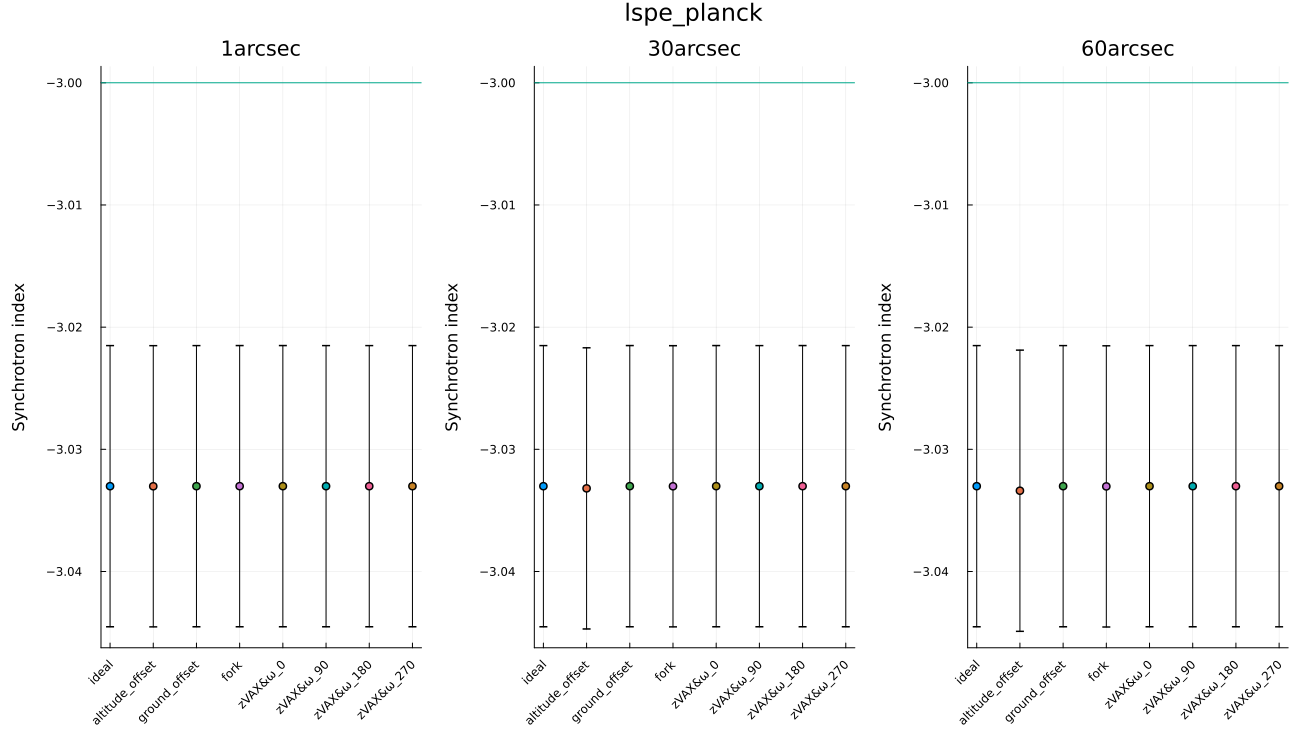

In [5]:
plots = []
for i in instrument
    push!(plots, plot_results(data, error, i, 1))
end
plot(plots..., layout = (3,1), size = (1300, 750))

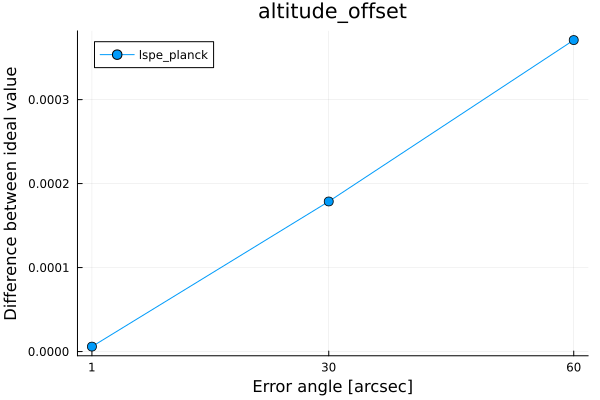

In [10]:
l = "altitude_offset"
i = "lspe_planck"

ideal = [data[i][k]["ideal"]["x"][1] for k in error]
ideal_sigma = [ sqrt.(diag(data[i][k]["ideal"]["Sigma"]))[1] for k in error]
plot_data = [data[i][k][l]["x"][1] for k in error]
plot_x = [1.0/3600, 0.5/60, 1.0/60]
data_sigma = [ sqrt.(diag(data[i][k][l]["Sigma"]))[1] for k in error]

yerror = sqrt.(ideal_sigma.^2 .+ data_sigma.^2)

plot(plot_x, [abs.(ideal .- plot_data)...], marker=(:circle,5), label = i)#, yerror = yerror)

plot!(xticks = ([plot_x...],["1", "30", "60"]))
xaxis!("Error angle [arcsec]")
yaxis!("Difference between ideal value")
title!(l)

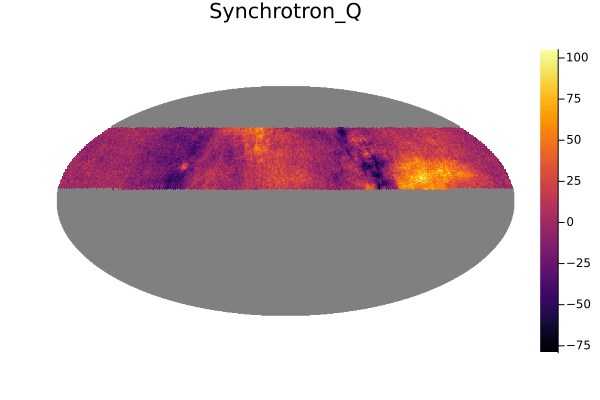

In [17]:
get_map_and_hist(data["lspe_planck"]["60arcsec"]["ideal"], "Q", 64)[1][3]